<a href="https://colab.research.google.com/github/D4N18L/Predicting-Job-Salaries-Using-Linear-Regression/blob/main/Predicting_Salary_Using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Predicting Salary Data from Years  of Experience Using Linear Regression

**Import the Necessary Libaries needed**

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Mount to Google Drive to allow the usage of the Dataset**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import the Dataset and Analyse it **

In [6]:
s_data = pd.read_csv("/content/drive/MyDrive/archive/Salary_Data.csv")

In [7]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
s_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
s_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


**Start splitting the datasets into X and Y groups **

In [10]:
#x data
x = s_data.loc[:,:"YearsExperience"].values

x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [11]:
#y data
y = s_data.loc[:,"Salary"].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

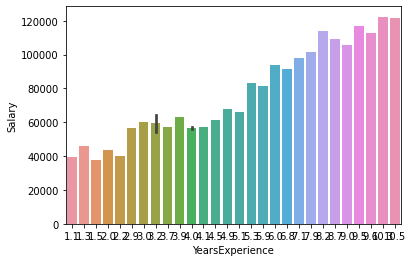

In [12]:
sns.barplot(x="YearsExperience",y="Salary" ,data=s_data)

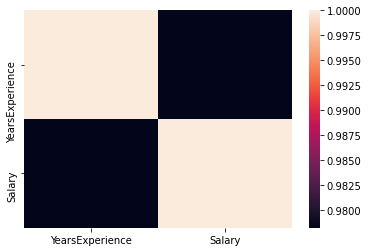

In [13]:
sns.heatmap(s_data.corr())

**Split the dataset into Training and Testing Groups with 66% to a 33% difference**

In [14]:
#Training = 66% Testing = 33%
X_train , X_test , Y_train , Y_test = train_test_split(x,y,test_size = 1/3 , random_state=0)


**Create an Instance of the Linear Regerssion Module  and train the training sets**

In [15]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Using what the variable "lr" has learnt from training the training sets , I used the predict function to attempt to predict "Y_test" using "Xtest"**

In [16]:
predict_y = lr.predict(X_test)
predict_y

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

Here I am visualizing what I have executed above for the (Training Set). 
I plot the actual figures for X_train , Y_train whiles also including a linear predictor line which tries to predict X_train

Text(0, 0.5, 'Salary')

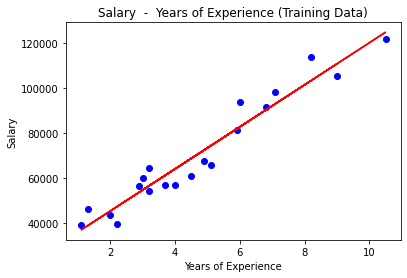

In [17]:
plt.scatter(X_train,Y_train,color = "blue")
plt.plot(X_train,lr.predict(X_train), color = "red")
plt.title("Salary  -  Years of Experience (Training Data)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")


Here I am visualizing what I have executed above.(Testing Set).  I plot the actual figures for X_test , Y_test whiles also including a linear predictor line which tries to predict X_train


---



Text(0, 0.5, 'Salary')

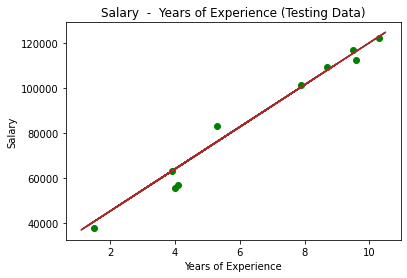

In [19]:
plt.scatter(X_test,Y_test, color = "green")
plt.plot(X_train,lr.predict(X_train), color = "brown")
plt.title("Salary  -  Years of Experience (Testing Data)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

In [20]:
print("MAE", metrics.mean_absolute_error(Y_test,predict_y))
print("MSE", metrics.mean_squared_error(Y_test,predict_y))
print("RMSE", np.sqrt(metrics.mean_absolute_error(Y_test,predict_y)))

MAE 3426.4269374307078
MSE 21026037.329511296
RMSE 58.535689433291104
